# SPARKIFY PROJECT - DATA EXPLORATION
This notebook **explores the result of the `Feature Engineering` phase made on the full dataset** within a cluster deployed on the cloud

## Import libraries, init Spark and load dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime
import re

%matplotlib inline

In [18]:
df = pd.read_csv('df_total_12GB.csv', header=0)
df.shape

(22278, 28)

In [19]:
df.head(10)

,churn,gender,level,timedelta,nb_unique_songs,nb_total_songs,nb_unique_artists,total_length,total_add_playlist,total_add_friend,...,Windows 8,iPad,iPhone,Macintosh,Linux,Unknown,Windows Vista,Windows 81,Windows XP,Windows Seven
0,1,1,1,77,945.0,1022.0,767.0,259349.89726,25.0,14.0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,65,1570.0,1778.0,1205.0,443147.60184,49.0,25.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,1,54,245.0,250.0,223.0,63271.01816,5.0,13.0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,1,131,1335.0,1472.0,1071.0,364286.86247,46.0,23.0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,1,116,234.0,236.0,215.0,59019.77876,7.0,4.0,...,0,0,0,0,0,0,0,0,1,0
5,0,1,1,96,3141.0,3847.0,2157.0,956838.11858,135.0,76.0,...,0,0,0,1,0,0,0,0,0,0
6,0,1,1,133,534.0,559.0,454.0,141589.19310,16.0,10.0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,1,126,440.0,455.0,389.0,114624.47292,11.0,7.0,...,0,0,0,0,0,0,0,0,0,1
8,1,0,1,63,1267.0,1409.0,1007.0,352855.68121,26.0,31.0,...,0,0,0,0,0,0,0,0,0,1
9,1,1,0,28,47.0,47.0,47.0,14715.27661,1.0,0.0,...,0,0,0,0,0,0,0,0,0,1


---
# DATA EXPLORATION

# Who are the churn users?
## `Gender` vs. churn

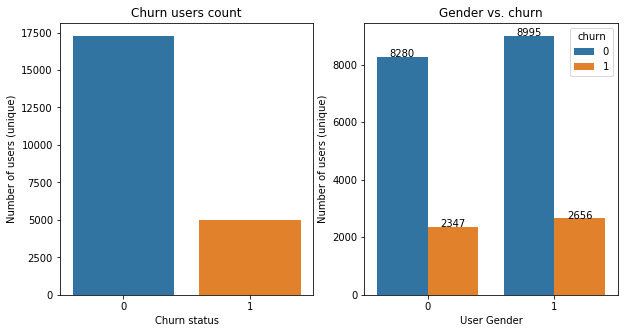

In [5]:
figure, axis = plt.subplots(1, 2, figsize=(10, 5))
axis[0].set_title("Churn users count")
axis[1].set_title("Gender vs. churn")
sns.countplot(x="churn", data=df, ax=axis[0])
sns.countplot(x="gender", hue="churn", data=df, ax=axis[1])
axis[0].set_xlabel("Churn status")
axis[0].set_ylabel("Number of users (unique)")
axis[1].set_xlabel("User Gender")
axis[1].set_ylabel("Number of users (unique)")

# Trick to display value on countplot graph
for p in axis[1].patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height() + 1
    value = '{}'.format(p.get_height())
    axis[1].text(_x, _y, value, ha="center")

plt.show()

## `Level` vs. churn

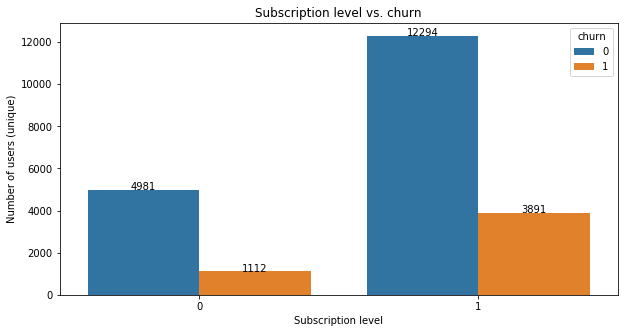

In [6]:
figure, axis = plt.subplots(1, 1, figsize=(10, 5))
axis.set_title("Subscription level vs. churn")
sns.countplot(x="level", hue="churn", data=df, ax=axis)
axis.set_xlabel("Subscription level")
axis.set_ylabel("Number of users (unique)")

# Trick to display value on countplot graph
for p in axis.patches:
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height() + 1
    value = '{}'.format(p.get_height())
    axis.text(_x, _y, value, ha="center")

plt.show()

## `Registration`: for how long have they used the service?
We have seen that the column `registration` refers to the date the user registered to the service, we can analyze for how long did the user tried the service before cancelling.

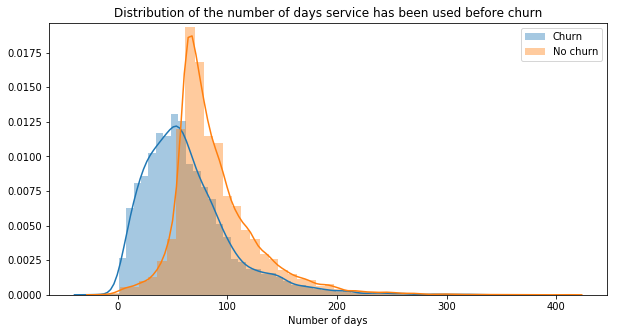

In [7]:
figure, axis = plt.subplots(1, 1, figsize=(10, 5))
axis.set_title("Distribution of the number of days service has been used before churn")
sns.distplot(a=df[df['churn'] == 1]['timedelta'], ax=axis, label="Churn")
sns.distplot(a=df[df['churn'] == 0]['timedelta'], ax=axis, label="No churn")
axis.set_xlabel("Number of days")
plt.legend(loc="best")
plt.show()

## User engagement with the service
Idea here is that the more a user interacted with the service (number of artists/songs listened, number of sessions, time spent listening) the more chances we have this user enjoys the service and then will not quit. Let's see if there are big differences between churn users and the others.

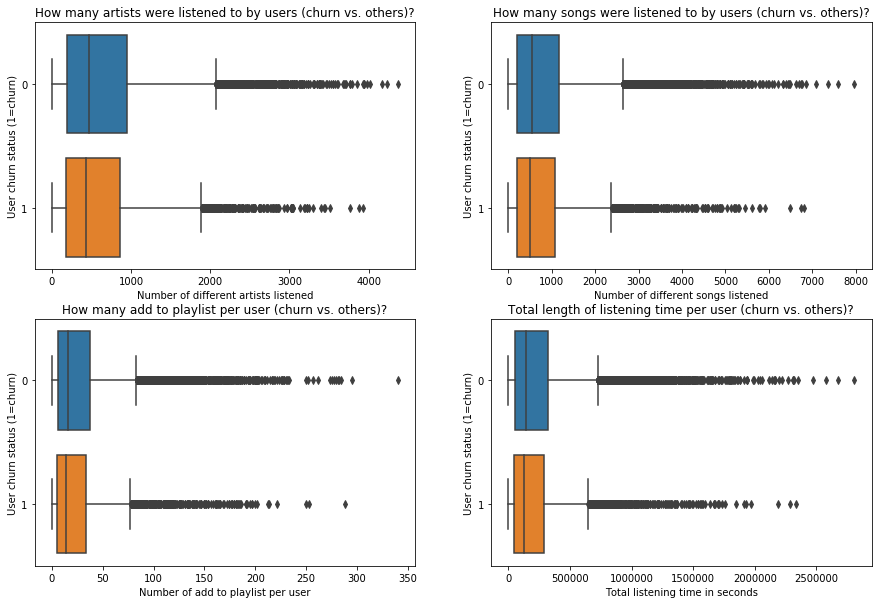

In [11]:
figure, axis = plt.subplots(2, 2, figsize=(15, 10))
axis[0][0].set_title("How many artists were listened to by users (churn vs. others)?")
axis[0][1].set_title("How many songs were listened to by users (churn vs. others)?")
axis[1][0].set_title("How many add to playlist per user (churn vs. others)?")
axis[1][1].set_title("Total length of listening time per user (churn vs. others)?")

sns.boxplot(x='nb_unique_artists', y='churn', data=df, ax=axis[0][0], orient="h")
sns.boxplot(x='nb_unique_songs', y='churn', data=df, ax=axis[0][1], orient="h")
sns.boxplot(x='total_add_playlist', y='churn', data=df, ax=axis[1][0], orient="h")
sns.boxplot(x='total_length', y='churn', data=df, ax=axis[1][1], orient="h")

axis[0][0].set_ylabel("User churn status (1=churn)")
axis[0][1].set_ylabel("User churn status (1=churn)")
axis[1][0].set_ylabel("User churn status (1=churn)")
axis[1][1].set_ylabel("User churn status (1=churn)")
axis[0][0].set_xlabel("Number of different artists listened")
axis[0][1].set_xlabel("Number of different songs listened")
axis[1][0].set_xlabel("Number of add to playlist per user")
axis[1][1].set_xlabel("Total listening time in seconds")

plt.legend(loc="best")
plt.show()

## Social interactions
Kind of the same idea: how many friends did the user add? How many `Thumbs up` or `Thumbs down`? Could it be a clue to detect incoming churn?

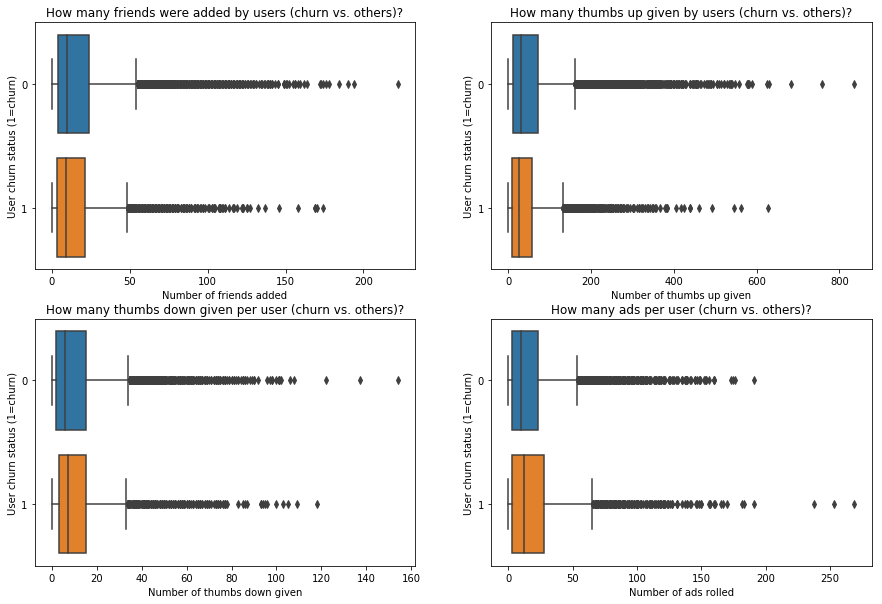

In [12]:
figure, axis = plt.subplots(2, 2, figsize=(15, 10))
axis[0][0].set_title("How many friends were added by users (churn vs. others)?")
axis[0][1].set_title("How many thumbs up given by users (churn vs. others)?")
axis[1][0].set_title("How many thumbs down given per user (churn vs. others)?")
axis[1][1].set_title("How many ads per user (churn vs. others)?")

sns.boxplot(x='total_add_friend', y='churn', data=df, ax=axis[0][0], orient="h")
sns.boxplot(x='total_thumbs_up', y='churn', data=df, ax=axis[0][1], orient="h")
sns.boxplot(x='total_thumbs_down', y='churn', data=df, ax=axis[1][0], orient="h")
sns.boxplot(x='total_ads', y='churn', data=df, ax=axis[1][1], orient="h")

axis[0][0].set_ylabel("User churn status (1=churn)")
axis[0][1].set_ylabel("User churn status (1=churn)")
axis[1][0].set_ylabel("User churn status (1=churn)")
axis[1][1].set_ylabel("User churn status (1=churn)")
axis[0][0].set_xlabel("Number of friends added")
axis[0][1].set_xlabel("Number of thumbs up given")
axis[1][0].set_xlabel("Number of thumbs down given")
axis[1][1].set_xlabel("Number of ads rolled")

plt.legend(loc="best")
plt.show()

## `Upgrade/Downgrade`, is there an impact?
While having a look at the different pages, I noticed 2 kind of pages that could be interesting ones: `Upgrade` and `Downgrade`. Intuition here is to say that if user has upgraded the service he is now more engaged whereas, on the other side, the "downgrade" step could be the first step towards the churn.  
Let's try to see if this is correct.

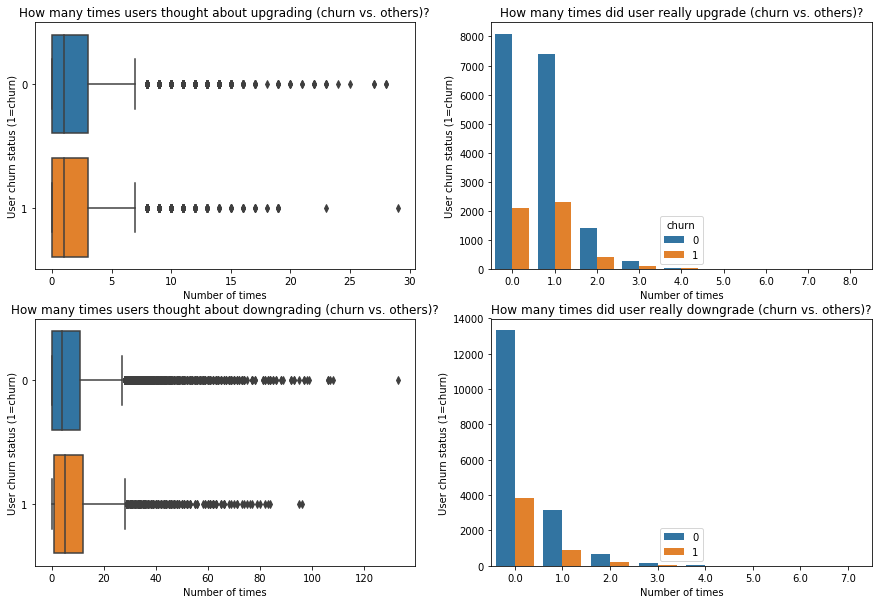

In [22]:
figure, axis = plt.subplots(2, 2, figsize=(15, 10))
axis[0][0].set_title("How many times users thought about upgrading (churn vs. others)?")
axis[0][1].set_title("How many times did user really upgrade (churn vs. others)?")
axis[1][0].set_title("How many times users thought about downgrading (churn vs. others)?")
axis[1][1].set_title("How many times did user really downgrade (churn vs. others)?")

sns.boxplot(x='think_upgrade', y='churn', data=df, ax=axis[0][0], orient="h")
sns.countplot(x='has_upgraded', hue='churn', data=df, ax=axis[0][1], orient="h")
sns.boxplot(x='think_downgrade', y='churn', data=df, ax=axis[1][0], orient="h")
sns.countplot(x='has_downgraded', hue='churn', data=df, ax=axis[1][1], orient="h")

axis[0][0].set_ylabel("User churn status (1=churn)")
axis[0][1].set_ylabel("User churn status (1=churn)")
axis[1][0].set_ylabel("User churn status (1=churn)")
axis[1][1].set_ylabel("User churn status (1=churn)")
axis[0][0].set_xlabel("Number of times")
axis[0][1].set_xlabel("Number of times")
axis[1][0].set_xlabel("Number of times")
axis[1][1].set_xlabel("Number of times")

plt.legend(loc="best")
plt.show()

## How many errors encountered per user?

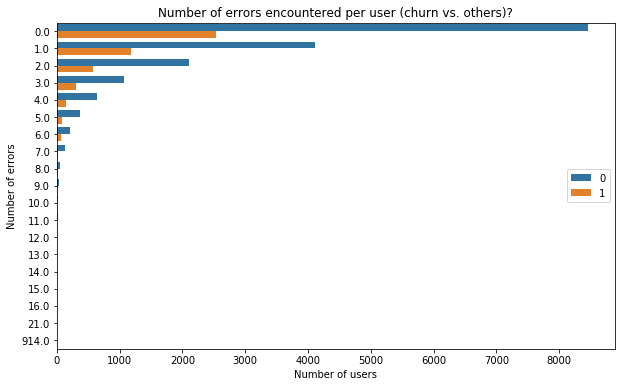

In [23]:
figure, axis = plt.subplots(1, 1, figsize=(10, 6))
axis.set_title("Number of errors encountered per user (churn vs. others)?")
sns.countplot(y='nb_404', hue='churn', data=df, ax=axis, orient="h")
axis.set_ylabel("Number of errors")
axis.set_xlabel("Number of users")
plt.legend(loc="best")
plt.show()